# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [75]:
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

with zipfile.ZipFile("../data/GlobalLandTemperaturesByMajorCity.csv.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [76]:
weather_df = df[df["dt"] >= "1850-01-01"]
weather_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
12,1850-01-01,25.803,1.943,Abidjan,Côte D'Ivoire,5.63N,3.23W
13,1850-02-01,27.890,1.430,Abidjan,Côte D'Ivoire,5.63N,3.23W
14,1850-03-01,27.852,2.173,Abidjan,Côte D'Ivoire,5.63N,3.23W
15,1850-04-01,26.547,1.662,Abidjan,Côte D'Ivoire,5.63N,3.23W
16,1850-05-01,25.379,1.355,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

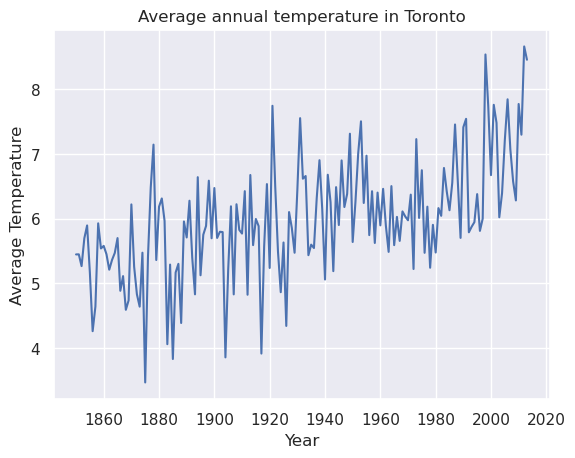

In [77]:
toronto_df = weather_df[weather_df["City"] == "Toronto"]
toronto_average_annual_temperature = toronto_df.groupby(toronto_df.dt.dt.year)["AverageTemperature"].mean()

plt.plot(toronto_average_annual_temperature)
plt.title("Average annual temperature in Toronto")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [105]:
temp_variance = weather_df.groupby(weather_df["City"])["AverageTemperature"].agg(np.var)
temp_variance.idxmax()

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).